In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deepMacroFin import PDEModel
from deepMacroFin import ActivationType, Comparator, EndogVar, EndogVarConditions, EndogEquation

## Model 1
$$\begin{bmatrix}\dot{x} \\ \dot{y}\end{bmatrix} = \begin{bmatrix} x+3y \\ 3x+y\end{bmatrix}, \begin{bmatrix}x(0) \\ y(0)\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix}$$

Solution: $\begin{bmatrix} x\\ y \end{bmatrix} = \frac{1}{2}\begin{bmatrix} e^{4t} + e^{-2t}\\ e^{4t} - e^{-2t} \end{bmatrix}$

In [2]:
ode1 = PDEModel("ode_system1")
ode1.set_state(["t"], {"t": [0., 1.]})
ode1.add_endog("x", config={
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [50, 50, 50],
    "activation_type": ActivationType.Tanh,
    "positive": False,
    "derivative_order": 2,
})
ode1.add_endog("y", config={
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [50, 50, 50],
    "activation_type": ActivationType.Tanh,
    "positive": False,
    "derivative_order": 2,
})
ode1.add_endog_equation("x_t = x + 3*y", label="base_ode1", weight=0.1)
ode1.add_endog_equation("y_t = 3*x + 1*y", label="base_ode2", weight=0.1)
ode1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="ic_x")
ode1.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "0", {},
                              label="ic_y")
print(ode1)
if not os.path.exists("./models/ode_system1.pt"):
    ode1.train_model("./models", "ode_system1.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/ode_system1.pt"))
    ode1.eval_model(True)

==========================Summary of Model ode_system1==========================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [0.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=50, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=50, out_features=50, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=50, out_features=50, bias=True)
    (activation_2): Tanh()
    (final_layer): Linear(in_features=50, out_features=1, bias=True)
  )
)
Num parameters: 5251
----------------------------------------------

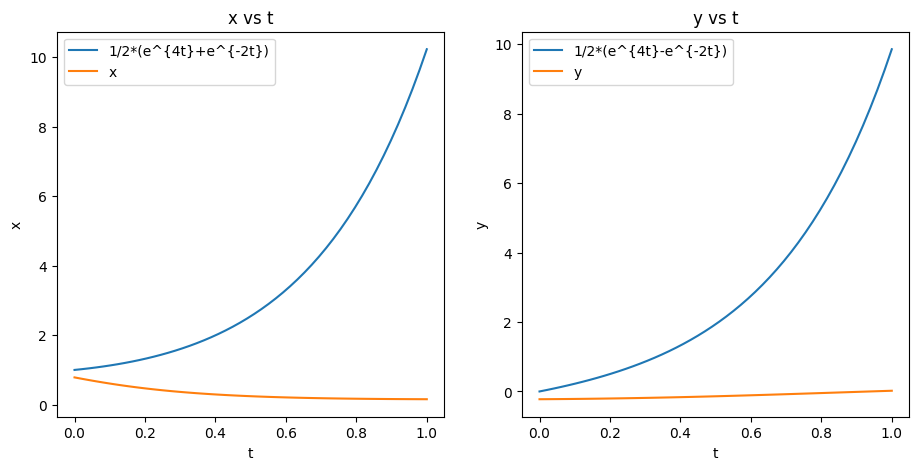

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
t = np.linspace(0., 1)
ax[0].plot(t, 0.5*(np.exp(3*t) + np.exp(-t)), label="1/2*(e^{4t}+e^{-2t})")
ax[1].plot(t, 0.5*(np.exp(3*t) - np.exp(-t)), label="1/2*(e^{4t}-e^{-2t})")
ode1.endog_vars["x"].plot("x", {"t": [0., 1.]}, ax=ax[0])
ode1.endog_vars["y"].plot("y", {"t": [0., 1.]}, ax=ax[1])
plt.subplots_adjust()
plt.show()

## Predator-Prey Model (Lotka–Volterra)
$$\begin{bmatrix}\dot{x} \\ \dot{y}\end{bmatrix} = \begin{bmatrix} \alpha x - \beta xy \\ \delta xy - \gamma y\end{bmatrix}$$

In the example, $\alpha=1.1, \beta=0.4, \delta=0.4, \gamma=0.1$

In [4]:
ode2 = PDEModel("ode_system2", {"num_epochs": 2000})
ode2.set_state(["t"], {"t": [0., 5.]})
ode2.add_endog("x")
ode2.add_endog("y")
ode2.add_endog_equation("x_t = 1.1 * x - 0.4*x*y", label="base_ode1")
ode2.add_endog_equation("y_t = 0.4 * x * y - 0.1 * y")
ode2.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
ode2.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(ode2)
if not os.path.exists("./models/ode_system2.pt"):
    ode2.train_model("./models", "ode_system2.pt", True)
    ode2.eval_model(True)
else:
    ode2.load_model(torch.load("./models/ode_system2.pt"))
    ode2.eval_model(True)

==========================Summary of Model ode_system2==========================
Config: {
 "num_epochs": 2000
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [0.0, 5.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Tanh()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Tanh()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Tanh()
    (linear_3): Linear(in_features=30, out_features=30, bias=True)
    (activation_3): Tanh()
    (final_layer): Linear(in_features=30, out_features=1, bias=True)
  )
)
Num par

Total loss: 0.0003: 100%|██████████| 2000/2000 [00:16<00:00, 121.62it/s]

training finished, total time :: 16.45346689224243
Model saved to ./models/ode_system2.pt
===================================Evaluating===================================
loss :: endogeq_base_ode1: 0.0001,
endogeq_2: 0.0001,
endogvar_x_cond_initial_condition: 0.0000,
endogvar_y_cond_initial_condition: 0.0000,
total_loss: 0.0003


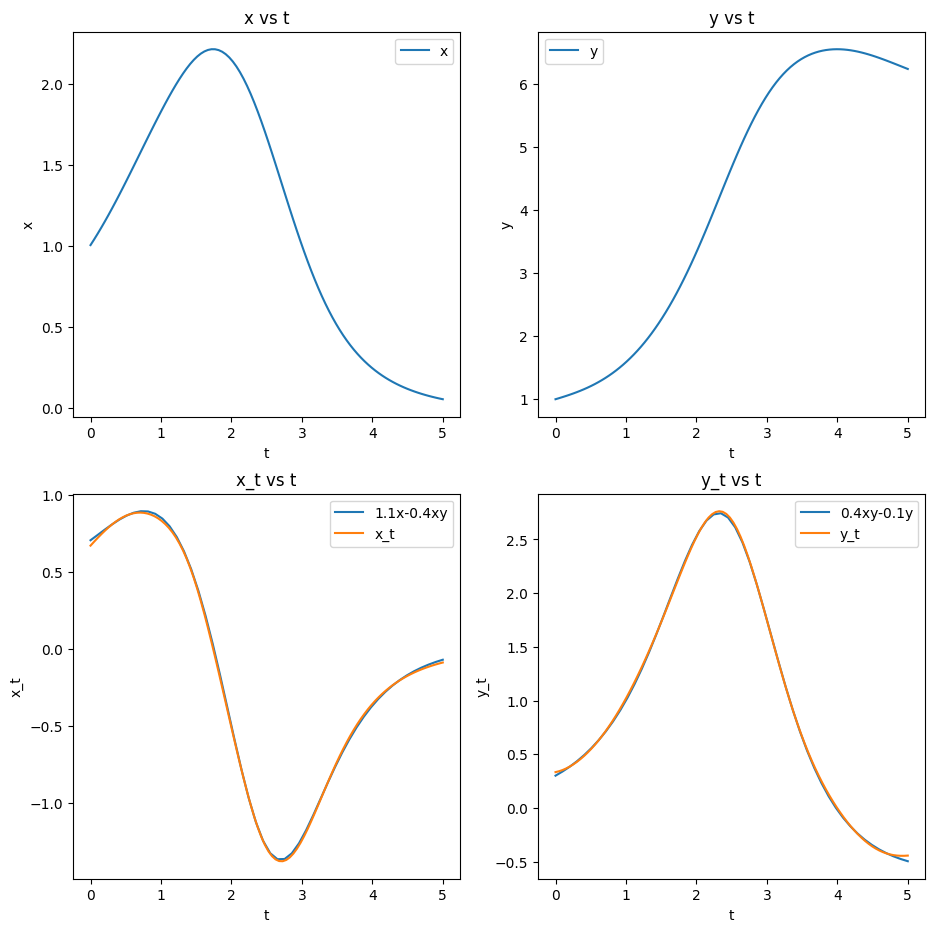

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(11, 11))
t = np.linspace(0., 5.)
x = ode2.endog_vars["x"].derivatives["x"](torch.Tensor(t).unsqueeze(-1).to(ode2.device)).detach().cpu().numpy()
y = ode2.endog_vars["y"].derivatives["y"](torch.Tensor(t).unsqueeze(-1).to(ode2.device)).detach().cpu().numpy()
ode2.endog_vars["x"].plot("x", {"t": [0., 5.]}, ax=ax[0][0])
ode2.endog_vars["y"].plot("y", {"t": [0., 5.]}, ax=ax[0][1])
ax[1][0].plot(t, 1.1*x-0.4*x*y, label="1.1x-0.4xy")
ax[1][1].plot(t, 0.4*x*y-0.1*y, label="0.4xy-0.1y")
ode2.endog_vars["x"].plot("x_t", {"t": [0., 5.]}, ax=ax[1][0])
ode2.endog_vars["y"].plot("y_t", {"t": [0., 5.]}, ax=ax[1][1])
plt.subplots_adjust()
plt.show()